In [3]:
import pandas as pd

<p style="align: center;"><img align=center src="TablesMap.PNG"  width=900></p>
<h3 style="text-align: center;"><b>«Схема базы данных»</b></h3>


* Classifiers  -  **Справочник тематик, к которым относятся задания диагностик ученика**
* DiagnosticResultDetails - **Результаты контрольных по заданиям**
* DiagnosticResults - **Результаты контрольных работ**
* EgeResultDetails - **Результаты ЕГЭ по заданиям**
* EgeResults - **Результаты ЕГЭ**
* MedalistResults - **Победители олимпиад и медалисты**
* MedalistSubjects - **Предметы, по которым ученик победил в олимпиадах**
* Participants - **Ученики**
* SelfDiagnosticResultDetails - **Результаты самопроверок**
* SelfDiagnosticResults - **Результаты самопроверок по заданиям**
* Subjects - **Cправочник предметов**

# Participants

In [207]:
#Код тематики
#Name Название тематики
#Parallel Параллель тематики
#SubjectId  Id предмета тематики

Participants = pd.read_csv('hackathon/Participants.csv', sep=',')
Participants.drop(columns ='Partition', inplace=True, axis=1)
Participants.rename(columns = {'Id':"ParticipantId"}, inplace=True)
Participants.columns
Participants.head(5)

,Parallel,OOCode,ParticipantId,Partition
0,11,01579317-C00F-44A6-B7FB-9ABF1AB30EA4,00026864-3382-494F-96D7-D0A6BB717A42,1
1,11,D4FA7F86-E5D1-4ECB-8EDE-4311208541B5,0004B810-D062-4E32-ACB5-0BCF3CBEF4F8,1
2,11,99C7AC53-838D-45AB-85ED-42BDD2F865CB,00051BBD-7F75-4D38-9BE1-E99E471DE10D,1
3,11,6B478DAF-4E07-4545-84B5-14770AC9C1C1,00285945-82E0-4A66-A08E-61ABC661E876,1
4,11,5E1C8BC2-6F0F-4A72-A7BE-58182AF5327E,00294E7E-CA56-4437-97CD-EBB7A2C71CC9,1


# EgeResults

In [222]:
EgeResults = pd.read_csv('hackathon/EgeResults.csv', sep=',')
EgeResults.drop(columns =['Partition', 'Id'], inplace=True, axis=1)
print(EgeResults.columns)
EgeResults.head(5)

Index(['ParticipantId', 'DateExam', 'MarkPercent', 'SubjectId'], dtype='object')


,ParticipantId,DateExam,MarkPercent,SubjectId
0,74A04FC2-A13B-468F-B4FF-08D4A3DDCEEA,2020-07-16,75,86
1,4C5F3B22-6439-4255-83A3-9C2573607F96,2020-07-20,77,9
2,539BF0E1-24D7-4323-8B36-EECAC7B5C0C5,2020-07-03,25,27
3,1BAE7BE4-5C78-4E0D-B29D-7E06454C830B,2020-07-13,83,77
4,5B3D82FB-D840-44DE-ADC0-A9CBEB2C06B2,2020-07-20,91,4


In [226]:
print(Participants.shape)
DATA = Participants.merge(EgeResults, how='left', on='ParticipantId')
print(DATA.shape)
print(DATA.columns)
DATA.head(3)

(11328, 3)
(38600, 6)
Index(['Parallel', 'OOCode', 'ParticipantId', 'DateExam', 'MarkPercent',
       'SubjectId'],
      dtype='object')


,Parallel,OOCode,ParticipantId,DateExam,MarkPercent,SubjectId
0,11,01579317-C00F-44A6-B7FB-9ABF1AB30EA4,00026864-3382-494F-96D7-D0A6BB717A42,2020-07-20,44,9
1,11,01579317-C00F-44A6-B7FB-9ABF1AB30EA4,00026864-3382-494F-96D7-D0A6BB717A42,2020-07-10,40,49
2,11,01579317-C00F-44A6-B7FB-9ABF1AB30EA4,00026864-3382-494F-96D7-D0A6BB717A42,2020-07-07,72,75


# MedalistResults

In [227]:
MedalistResults = pd.read_csv('MedalistResults.csv', sep=',')
MedalistResults.drop(columns=['Partition', 'Id'],inplace=True)
print(MedalistResults.shape)
MedalistResults.head(3)

(1836, 2)


,Type,ParticipantId
0,0,B693A6E8-E8C9-40F5-8E63-0083317462F5
1,0,EAC81C2C-E4C8-4213-A077-C013281F477A
2,0,3E8F291A-8192-4389-B1E2-B1AF873E152F


In [228]:
print(Participants.shape)
DATA = DATA.merge(MedalistResults, how='left', on='ParticipantId')
print(DATA.shape)
print(DATA.columns)
DATA.Type.fillna(-1, inplace=True)
DATA.head(3)

(11328, 3)
(38735, 7)
Index(['Parallel', 'OOCode', 'ParticipantId', 'DateExam', 'MarkPercent',
       'SubjectId', 'Type'],
      dtype='object')


,Parallel,OOCode,ParticipantId,DateExam,MarkPercent,SubjectId,Type
0,11,01579317-C00F-44A6-B7FB-9ABF1AB30EA4,00026864-3382-494F-96D7-D0A6BB717A42,2020-07-20,44,9,-1.0
1,11,01579317-C00F-44A6-B7FB-9ABF1AB30EA4,00026864-3382-494F-96D7-D0A6BB717A42,2020-07-10,40,49,-1.0
2,11,01579317-C00F-44A6-B7FB-9ABF1AB30EA4,00026864-3382-494F-96D7-D0A6BB717A42,2020-07-07,72,75,-1.0


In [229]:
# Participants['OOCode'].value_counts() Взять самые частые
# Participants.Parallel.value_counts() Есть 10е классы

In [237]:
DATA.ParticipantId.nunique()

11328

In [235]:
DiagnosticResults = pd.read_csv('DiagnosticResults.csv', sep=',')
DiagnosticResults.drop(columns='Partition',inplace=True, axis=1)
print(DiagnosticResults.shape)
DiagnosticResults.head(3)

(11360, 8)


,ResultId,Source,ParticipantId,StudentParallel,TestDate,Mark,MaxMark,SubjectId
0,187000,0,C70E4C52-34C9-4FBE-9B52-4B78AE43C2DA,11,2019-11-08 16:52:48,25.0,33,75
1,239604,0,20647873-4AA8-42E3-B7FE-51DE8E0BEAF5,11,2020-03-20 15:04:33,12.0,30,77
2,239606,0,4DFEFA69-EB35-44BD-B239-6AA4DE66F866,11,2020-03-20 15:06:19,24.0,31,86


1    11360
Name: Partition, dtype: int64

In [179]:
Classifiers = pd.read_csv('hackathon/Classifiers.csv', sep=',')
Classifiers

,Id,Code,Name,Parallel,SubjectId
0,1,.1.1.1,Информация. Язык как способ представления и пе...,7.0,27.0
1,2,.1.1.4,Знание основ дидактики и педагогики,100.0,57.0
2,3,.1.2.2,"Определение главной мысли, основного содержани...",3.0,88.0
3,4,.1.2.6,Знание взаимосвязи видов искусства,100.0,57.0
4,5,.1.2.7,"Постановка вопросов, ответы на вопросы по соде...",-1.0,88.0
...,...,...,...,...,...
10493,10494,4.1-4.3,Производная. Исследование функций. Первообразн...,11.0,49.0
10494,10495,"5.1, 5.5",Планиметрия. Измерение геометрических величин,11.0,49.0
10495,10496,"5.1.1-5.1.4, 5.5.1-5.5.5","Треугольник. Параллелограмм, прямоугольник, ро...",11.0,49.0
10496,10497,5.2-5.5,Прямые и плоскости в пространстве. Многогранни...,11.0,49.0


In [176]:
# cols = []
# for col in Classifiers.columns:
#     try: Classifiers[col] = Classifiers[col].str.replace('"','')
#     except: pass
#     cols.append(col.replace('"',''))
    
# Classifiers.columns = cols
# Classifiers.head(3)

In [177]:
Classifiers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10498 entries, 0 to 10497
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         10498 non-null  int64  
 1   Code       10497 non-null  object 
 2   Name       10497 non-null  object 
 3   Parallel   10497 non-null  float64
 4   SubjectId  10497 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 410.2+ KB


In [130]:
DiagnosticResultDetails = pd.read_csv('DiagnosticResultDetails.csv', sep=',')
DiagnosticResultDetails.head(3)

,Id,ResultId,Source,NumberInKim,Mark,MaxMark,ClassifierId,Partition
0,3151177,187000,0,1,0,2.0,1883,1
1,3151178,187000,0,2,1,1.0,2579,1
2,3151179,187000,0,3,1,1.0,2894,1


,ResultId,Source,ParticipantId,StudentParallel,TestDate,Mark,MaxMark,SubjectId,Partition
0,187000,0,C70E4C52-34C9-4FBE-9B52-4B78AE43C2DA,11,2019-11-08 16:52:48,25.0,33,75,1
1,239604,0,20647873-4AA8-42E3-B7FE-51DE8E0BEAF5,11,2020-03-20 15:04:33,12.0,30,77,1
2,239606,0,4DFEFA69-EB35-44BD-B239-6AA4DE66F866,11,2020-03-20 15:06:19,24.0,31,86,1


In [132]:
EgeResultDetails = pd.read_csv('EgeResultDetails.csv', sep=',')
EgeResultDetails.head(3)

,Id,ResultId,Part,NumberInPart,Number,Mark,MaxMark,ClassifierId,Partition
0,39,4EF9DB0D-2E75-4654-A74C-0000317B2FC1,1,1,\N,1,1,3914,1
1,40,4EF9DB0D-2E75-4654-A74C-0000317B2FC1,1,2,\N,1,1,1252,1
2,41,4EF9DB0D-2E75-4654-A74C-0000317B2FC1,1,3,\N,1,1,498,1


In [152]:
# EgeResultDetails['MaxMark'].value_counts()
# Number дропнуть !

In [147]:
EgeResultDetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1239386 entries, 0 to 1239385
Data columns (total 9 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   Id            1239386 non-null  int64 
 1   ResultId      1239386 non-null  object
 2   Part          1239386 non-null  int64 
 3   NumberInPart  1239386 non-null  int64 
 4   Number        1239386 non-null  object
 5   Mark          1239386 non-null  int64 
 6   MaxMark       1239386 non-null  int64 
 7   ClassifierId  1239386 non-null  object
 8   Partition     1239386 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 85.1+ MB


,Id,ParticipantId,DateExam,MarkPercent,SubjectId,Partition
0,000176B3-FD22-464F-80E4-1903332D8EFF,74A04FC2-A13B-468F-B4FF-08D4A3DDCEEA,2020-07-16,75,86,1
1,0007FBF5-CECE-4769-AAA4-F8D3B54460DE,4C5F3B22-6439-4255-83A3-9C2573607F96,2020-07-20,77,9,1
2,0008DF1B-A868-4A0E-AFEC-3F5F3EDB3D5D,539BF0E1-24D7-4323-8B36-EECAC7B5C0C5,2020-07-03,25,27,1


In [154]:
EgeResults.columns

Index(['Id', 'ParticipantId', 'DateExam', 'MarkPercent', 'SubjectId',
       'Partition'],
      dtype='object')

In [156]:
EgeResults['SubjectId'].value_counts()

75    11260
49     7835
77     3323
61     3204
27     3191
9      3070
86     2848
4      2279
31      853
44      485
12      156
58       42
82       41
37        6
5         6
30        1
Name: SubjectId, dtype: int64

<AxesSubplot:>

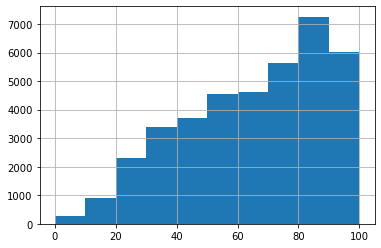

In [157]:
# EgeResults['MarkPercent'].hist()

,Id,Type,ParticipantId,Partition
0,25,0,B693A6E8-E8C9-40F5-8E63-0083317462F5,1
1,27,0,EAC81C2C-E4C8-4213-A077-C013281F477A,1
2,50,0,3E8F291A-8192-4389-B1E2-B1AF873E152F,1


In [135]:
MedalistSubjects = pd.read_csv('MedalistSubjects.csv', sep=',')
MedalistSubjects.head(3)

,ResultId,Id,SubjectId,Partition
0,379,1,48,1
1,399,24,64,1
2,415,40,58,1


,Parallel,OOCode,Id,Partition
0,11,01579317-C00F-44A6-B7FB-9ABF1AB30EA4,00026864-3382-494F-96D7-D0A6BB717A42,1
1,11,D4FA7F86-E5D1-4ECB-8EDE-4311208541B5,0004B810-D062-4E32-ACB5-0BCF3CBEF4F8,1
2,11,99C7AC53-838D-45AB-85ED-42BDD2F865CB,00051BBD-7F75-4D38-9BE1-E99E471DE10D,1


In [137]:
SelfDiagnosticResultDetails = pd.read_csv('SelfDiagnosticResultDetails.csv', sep=',')
SelfDiagnosticResultDetails.head(3)

,Id,ResultId,NumberInKim,Mark,MaxMark,ClassifierId,Partition
0,36837244,2369230,1,\N,1.0,5206,1
1,36837245,2369230,2,\N,1.0,10170,1
2,36837246,2369230,3,\N,1.0,9822,1


In [139]:
SelfDiagnosticResults = pd.read_csv('SelfDiagnosticResults.csv', sep=',')
SelfDiagnosticResults.head(3)

,Id,ParticipantId,StudentParallel,TestDate,Mark,MaxMark,SubjectId,Partition
0,2369230,594F27DE-1479-476C-8CB6-A76EA1AB25C9,9,2019-09-01 00:03:20,0,10,27,1
1,2370235,C4285D8C-9B23-43C8-AECD-EC4271D48A59,10,2019-09-01 10:38:27,14,21,86,1
2,2375593,9B7CD84C-BEB9-492A-B878-49A4750D805B,9,2019-09-01 17:36:53,8,12,75,1


In [140]:
SelfDiagnosticResults = pd.read_csv('Subjects.csv', sep=',')
SelfDiagnosticResults.head(3)

,Id,Name
0,1,Академический класс
1,2,Академический профиль
2,3,Алгебра
